In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold,KFold
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

tf.random.set_seed(42)

In [3]:
x = pd.read_csv("/kaggle/input/features/SelectedFeaturesVGGFinalOS.csv")
# x = pd.read_csv("../input/selectedfeaturesalexnet/SelectedFeaturesAlex.csv")
y = pd.read_csv("/kaggle/input/features/FeatureTargetVGGFinalOS.csv")
y = y.iloc[:, [1]]

x_TEST = pd.read_csv("/kaggle/input/features/SelectedFeaturesVGGFinalTESTOS.csv")
# x = pd.read_csv("../input/selectedfeaturesalexnet/SelectedFeaturesAlex.csv")
y_TEST = pd.read_csv("/kaggle/input/features/FeatureTargetVGGFinalTESTOS.csv")
y_TEST = y_TEST.iloc[:, [1]]

In [4]:
x.head()

,VGGNet_Avg_F2,VGGNet_Avg_F10,VGGNet_Avg_F14,VGGNet_Avg_F16,VGGNet_Avg_F19,VGGNet_Avg_F24,VGGNet_Avg_F25,VGGNet_Avg_F26,VGGNet_Avg_F28,VGGNet_Avg_F29,...,VGGNet_Std_F279,VGGNet_Std_F283,VGGNet_Std_F333,VGGNet_Std_F397,VGGNet_Std_F419,VGGNet_Std_F433,VGGNet_Std_F435,VGGNet_Std_F440,VGGNet_Std_F482,VGGNet_Std_F502
0,-0.461977,1.421153,0.742749,3.648913,2.531059,3.771648,-0.767169,0.195017,2.594478,-0.248365,...,-0.728935,-0.143834,-0.642818,-0.423521,-0.649434,-0.707018,0.167057,2.159106,-1.236228,0.252740
1,0.632044,1.220750,-0.614688,0.789595,0.383919,-0.178435,-0.549554,2.226843,0.076879,-0.693393,...,1.138246,-0.200505,0.144257,1.279785,0.348550,-1.083088,-0.275644,0.264321,-0.085584,-0.171767
2,0.307536,0.249546,-0.815839,-0.826767,0.252674,-0.715681,-0.335277,-0.194902,-1.000822,-0.977478,...,0.200414,0.532885,0.536397,-0.019262,1.461627,-1.396584,-0.701988,-0.985926,-1.358594,-0.845208
3,-1.024092,1.202471,-0.082182,0.319361,1.373717,-0.397513,-0.413927,0.949279,1.240608,0.163637,...,-0.196458,-0.784845,1.245812,-0.468658,1.752369,0.183090,1.855076,-0.097589,-0.365565,-0.419346
4,0.194528,-0.489830,-0.500257,0.324835,0.118961,-0.370201,0.037031,-0.046783,1.098665,0.719865,...,-0.762064,2.104353,-0.855037,-0.073737,0.556207,1.533446,-0.492790,-0.373100,0.218922,0.200493


In [5]:
x.shape,y.shape

((399, 120), (399, 1))

In [6]:
# y = label_binarize(y, classes=[0,1])
y.head()

,Survival_binary
0,0
1,1
2,1
3,1
4,1


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify = y,random_state=322)


In [8]:
input_shape = x_train.shape[1]
input_shape

120

In [9]:
def createModel():
    model = keras.Sequential([
    layers.Dense(60, activation='relu',input_shape=[input_shape]),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
#     layers.Dense(10, activation='sigmoid'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate=0.2),
    layers.Dense(1,'sigmoid')
    ])
    
    return model

In [10]:
# keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [11]:

# # optimizer = keras.optimizers.Adam(learning_rate=0.5)
# optimizer = keras.optimizers.Adam(learning_rate = 0.005)
# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     metrics=['categorical_accuracy'],
# )

In [12]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.0001,
#     restore_best_weights=True,
# )

# history = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     batch_size=30,
#     epochs=500,
# #     callbacks=[early_stopping],
#     verbose=1, # hide the output because we have so many epochs
# )

# #batch_size = 10, epochs = 100

In [13]:
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
#   0.001,
#   decay_steps=STEPS_PER_EPOCH*1000,
#   decay_rate=1,
#   staircase=False)

# def get_optimizer():
#     return tf.keras.optimizers.Adam(lr_schedule)

In [14]:
kf = KFold(n_splits=10)
fold = 0
res = []
loss = []
acc = []
models = []

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
    
    model = createModel()
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        batch_size=60,
        epochs=100,
        shuffle = True,
    #     callbacks=[early_stopping],
        verbose=0, # hide the output because we have so many epochs
    )
    
    history_df = pd.DataFrame(history.history)
    loss_curr = history_df['val_loss'].min()
    acc_curr = history_df['val_accuracy'].max()
    
    print('Fold',fold)
    print('Val loss',loss_curr)
    print('Val accuracy',acc_curr)
    print('------------------')
    
    fold += 1
    
    loss.append(loss_curr)
    acc.append(acc_curr)
    res.append(history)
    models.append(model)
    
    

Fold 0
Val loss 0.6719484329223633
Val accuracy 0.7250000238418579
------------------
Fold 1
Val loss 0.6136761903762817
Val accuracy 0.6499999761581421
------------------
Fold 2
Val loss 0.5962119102478027
Val accuracy 0.7250000238418579
------------------
Fold 3
Val loss 0.6092444658279419
Val accuracy 0.6499999761581421
------------------
Fold 4
Val loss 0.6911529302597046
Val accuracy 0.7250000238418579
------------------
Fold 5
Val loss 0.6844565868377686
Val accuracy 0.699999988079071
------------------
Fold 6
Val loss 0.7219932079315186
Val accuracy 0.6000000238418579
------------------
Fold 7
Val loss 0.5346193909645081
Val accuracy 0.7749999761581421
------------------
Fold 8
Val loss 0.5525707602500916
Val accuracy 0.7749999761581421
------------------
Fold 9
Val loss 0.6511337161064148
Val accuracy 0.6666666865348816
------------------


Best Validation Loss: 0.5346
Best Validation Accuracy: 0.7750


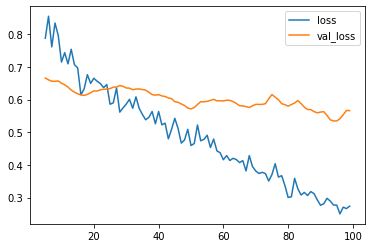

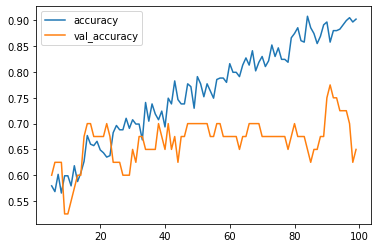

In [15]:
# plot graphs

history_df = pd.DataFrame(res[7].history)
# print(history_df)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

[]

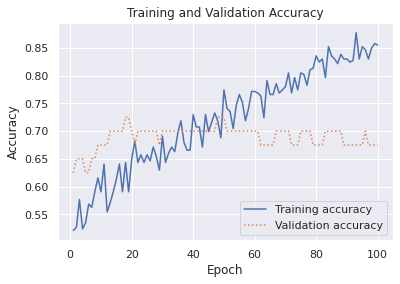

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
hist = res[2]
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

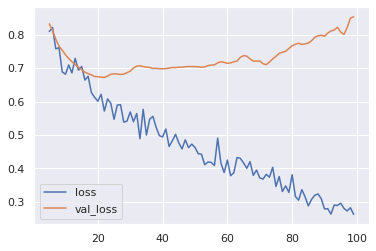

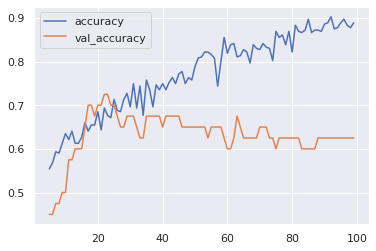

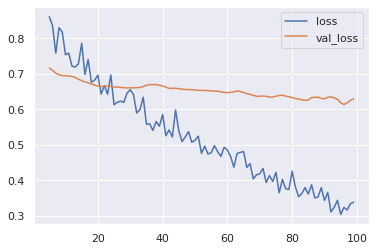

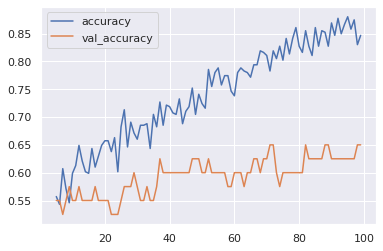

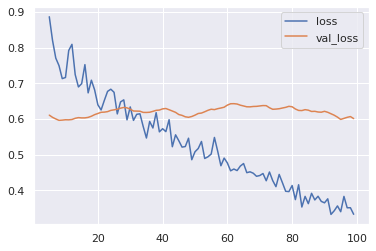

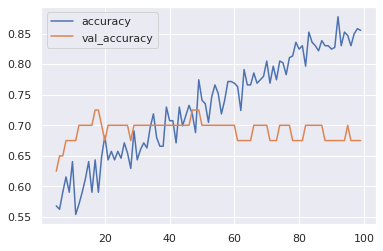

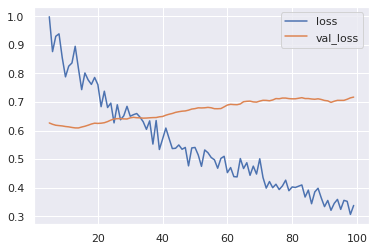

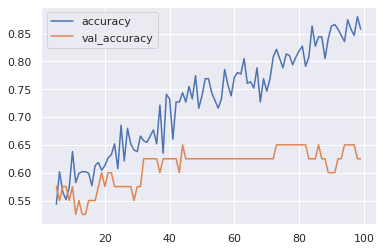

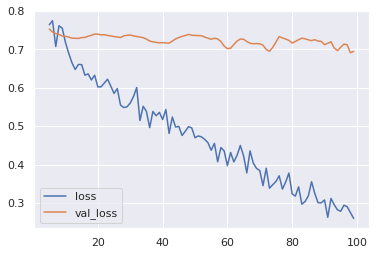

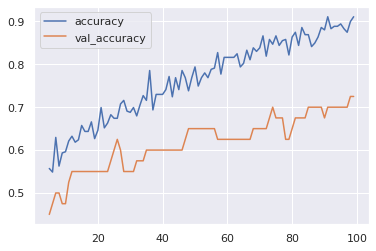

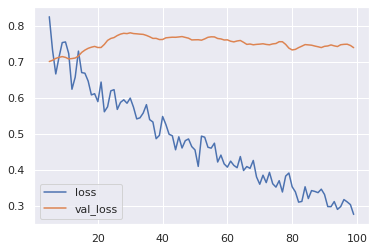

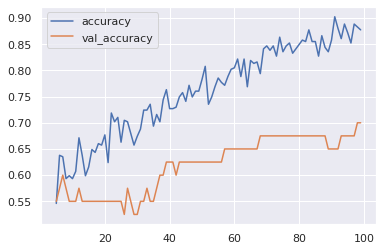

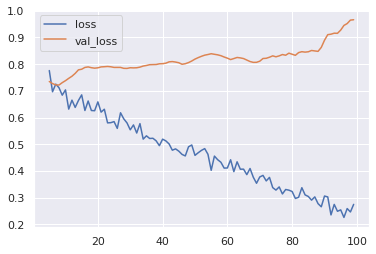

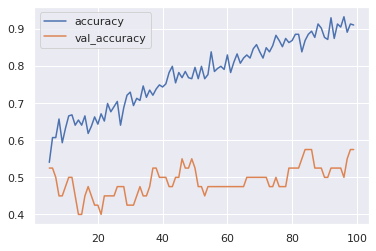

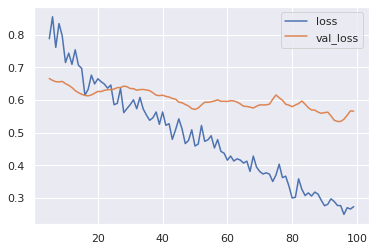

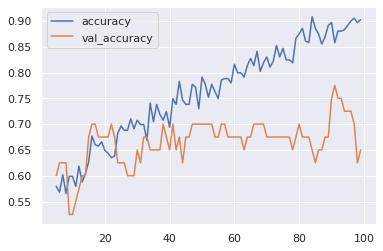

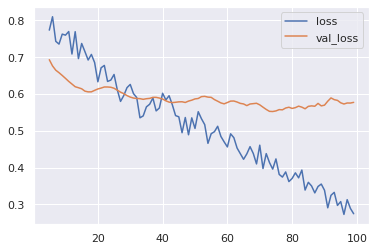

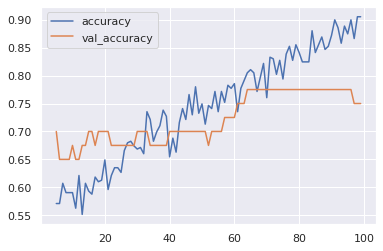

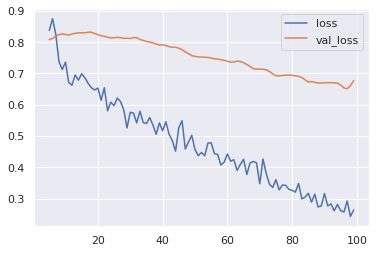

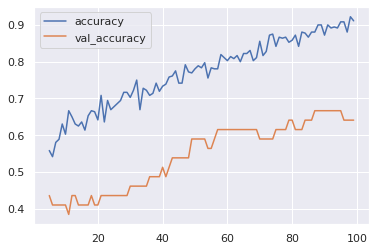

In [17]:
for i in range(len(res)):
#     plt.figure()
    history_df = pd.DataFrame(res[i].history)
    # print(history_df)
    # Start the plot at epoch 5
    history_df.loc[5:, ['loss', 'val_loss']].plot()
    history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()
    

In [18]:
newModel = models[7]

In [19]:
newModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 60)                7260      
_________________________________________________________________
batch_normalization_14 (Batc (None, 60)                240       
_________________________________________________________________
dropout_14 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                610       
_________________________________________________________________
batch_normalization_15 (Batc (None, 10)                40        
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [20]:
newModel.pop()

In [21]:
newModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 60)                7260      
_________________________________________________________________
batch_normalization_14 (Batc (None, 60)                240       
_________________________________________________________________
dropout_14 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                610       
_________________________________________________________________
batch_normalization_15 (Batc (None, 10)                40        
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
Total params: 8,150
Trainable params: 8,010
Non-trainable params: 140
__________________________________________________

In [22]:
newFeatures = newModel.predict(x) 
newFeatures_test = newModel.predict(x_TEST) 

In [23]:
newFeatures.shape

(399, 10)

In [24]:
newFeaturesDf = pd.DataFrame(newFeatures)
newFeaturesDf_test = pd.DataFrame(newFeatures)

In [25]:
newFeaturesDf.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.549420,1.080261,-0.627806,-0.869604,-0.560226,0.287234,1.075178,1.638245,-0.995442,-0.817679
1,1.431030,-0.823168,1.050799,1.813615,-0.560226,-0.682113,-0.644183,-0.558075,1.304065,1.301686
2,1.947805,-0.823168,0.094528,1.489147,-0.388830,-0.600974,-0.644183,-0.558075,0.260885,0.483782
3,-0.549420,-0.643069,0.005925,0.704658,-0.560226,-0.682113,-0.644183,-0.558075,-0.955334,-0.080682
4,0.581229,-0.823168,1.713470,2.707116,-0.560226,-0.682113,-0.644183,-0.558075,2.429895,3.072438


In [26]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

newFeaturesDf = min_max_scaler.fit_transform(newFeaturesDf)
newFeaturesDf_test = min_max_scaler.fit_transform(newFeaturesDf_test)


In [27]:
newFeaturesDf = pd.DataFrame(data = newFeaturesDf)
newFeaturesDf_test = pd.DataFrame(data = newFeaturesDf_test)

newFeaturesDf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.377732,0.000000,0.000000,0.000000,0.292777,0.491256,0.533859,0.000000,0.000000
1,0.572883,0.000000,0.424560,0.563177,0.000000,0.000000,0.000000,0.000000,0.318511,0.500066
2,0.722370,0.000000,0.182696,0.495075,0.044882,0.024507,0.000000,0.000000,0.174017,0.307081
3,0.000000,0.035740,0.160286,0.330419,0.000000,0.000000,0.000000,0.000000,0.005555,0.173895
4,0.327062,0.000000,0.592165,0.750712,0.000000,0.000000,0.000000,0.000000,0.474453,0.917876


In [28]:
merged_df = x.join(newFeaturesDf)
merged_df_test = x_TEST.join(newFeaturesDf_test)

In [29]:
merged_df.shape

(399, 130)

In [30]:
merged_df.head()

,VGGNet_Avg_F2,VGGNet_Avg_F10,VGGNet_Avg_F14,VGGNet_Avg_F16,VGGNet_Avg_F19,VGGNet_Avg_F24,VGGNet_Avg_F25,VGGNet_Avg_F26,VGGNet_Avg_F28,VGGNet_Avg_F29,...,0,1,2,3,4,5,6,7,8,9
0,-0.461977,1.421153,0.742749,3.648913,2.531059,3.771648,-0.767169,0.195017,2.594478,-0.248365,...,0.000000,0.377732,0.000000,0.000000,0.000000,0.292777,0.491256,0.533859,0.000000,0.000000
1,0.632044,1.220750,-0.614688,0.789595,0.383919,-0.178435,-0.549554,2.226843,0.076879,-0.693393,...,0.572883,0.000000,0.424560,0.563177,0.000000,0.000000,0.000000,0.000000,0.318511,0.500066
2,0.307536,0.249546,-0.815839,-0.826767,0.252674,-0.715681,-0.335277,-0.194902,-1.000822,-0.977478,...,0.722370,0.000000,0.182696,0.495075,0.044882,0.024507,0.000000,0.000000,0.174017,0.307081
3,-1.024092,1.202471,-0.082182,0.319361,1.373717,-0.397513,-0.413927,0.949279,1.240608,0.163637,...,0.000000,0.035740,0.160286,0.330419,0.000000,0.000000,0.000000,0.000000,0.005555,0.173895
4,0.194528,-0.489830,-0.500257,0.324835,0.118961,-0.370201,0.037031,-0.046783,1.098665,0.719865,...,0.327062,0.000000,0.592165,0.750712,0.000000,0.000000,0.000000,0.000000,0.474453,0.917876


In [31]:
columns = ['VGG_F' + str(i) for i in range(merged_df.shape[1])]
merged_df.to_csv('SelectedFeaturesVGGFinalMergedOS.csv',index = None,header = columns)

columns = ['VGG_F' + str(i) for i in range(merged_df_test.shape[1])]
merged_df_test.to_csv('SelectedFeaturesVGGFinalMergedTESTOS.csv',index = None,header = columns)

In [32]:
merged_df_test.shape

(50, 130)

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Step 4: Merge the features extracted from Resnet and VGGN and concatenate them together
concatenated_features = np.concatenate((featureres, featurevgg), axis=1)

# Step 5: Check for correlation and remove similar features
corr_matrix = np.corrcoef(concatenated_features, rowvar=False)
corr_matrix = np.abs(corr_matrix)
n_features = corr_matrix.shape[0]
features_to_keep = np.ones(n_features, dtype=bool)
for i in range(n_features):
    for j in range(i+1, n_features):
        if corr_matrix[i, j] > 0.9:
            if np.sum(features_to_keep[j:]) > 1:
                features_to_keep[j] = False
            else:
                features_to_keep[i] = False
                break
concatenated_features = concatenated_features[:, features_to_keep]

# Step 6: Train an SVM model using Stratified Kfold cross validation and grid search cv
scaler = StandardScaler()
svc = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
best_svc = None
for i, (train, test) in enumerate(cv.split(concatenated_features, target_df)):
    X_train = concatenated_features[train]
    y_train = target_df[train].values.ravel()
    X_test = concatenated_features[test]
    y_test = target_df[test].values.ravel()
    
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, scoring='roc_auc')
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    grid_search.fit(X_train_scaled, y_train)
    best_svc_fold = grid_search.best_estimator_
    if i == 0:
        best_svc = best_svc_fold
    
    y_score = best_svc_fold.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    print('Fold %d ROC AUC: %.4f' % (i+1, roc_auc))

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.fill_between(mean_fpr, mean_tpr - std_auc, mean_tpr + std_auc, alpha=.2, color='b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='


SyntaxError: EOL while scanning string literal (2414039076.py, line 67)